# Proyecto Final - Algoritmos Genéticos

#### Mónica Ángeles Sánchez 317159662

In [1]:
# Biblioteca:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
import math

In [2]:
# Creamos una función que genera un color para asignarle a un vértice,
# asegurándose de que dicho color no esté siendo utilizado por ningún vértice adyacente

def encontrar_color_valido(vertice, solucion, matriz_adyacencia):
    num_vertices = len(solucion)
    # Crea una lista para registrar los colores utilizados
    colores_invalidos = [False] * (num_vertices + 1)
    
    # Marca los colores de los vértices adyacentes como no válidos
    for i in range(num_vertices):
        # Si son adyacentes, el color no es válido
        if matriz_adyacencia[vertice][i] == 1:
            colores_invalidos[solucion[i]] = True
    
    # Encuentra un color válido (no usado por ningún adyacente)
    while True:
        color = random.randint(0, num_vertices)
        if not colores_invalidos[color]:
            break
    
    return color

In [3]:
# Creamos una función que genera soluciones aleatorias válidas, es decir,
# ningún vértice adyacente tiene el mismo color.

def solucion_aleatoria(matriz_adyacencia, num_vertices):
    solucion = []
    for i in range(num_vertices):
        solucion.append(encontrar_color_valido(i, solucion, matriz_adyacencia))
    return solucion

In [4]:
# Creamos una función que toma como entrada una solución dada, que es una lista de colores
# asignados a cada vértice de una gráfica, y devuelve el número total de colores distintos 
# utilizados en esa solución para colorear la gráfica.

def evaluar_solucion(solucion):
    colores_usados = [False] * (num_vertices + 1)
    total_colores = 0
    # Itera sobre la solución, marca los colores ya utilizados y cuenta el número de apariciones
    for color in solucion:
        if not colores_usados[color]:
            colores_usados[color] = True
            total_colores += 1
    # Regresa el número de colores utilizados para colorear la gráfica
    return total_colores

In [5]:
# Creamos una función que genera una población inicial de soluciones aleatorias

def poblacion_inicial(matriz_adyacencia, num_vertices, n_poblacion):
    poblacion = []
    for _ in range(n_poblacion):
        poblacion.append(solucion_aleatoria(matriz_adyacencia,num_vertices))
    return poblacion

In [6]:
# Creamos el método de selección de torneo 

rand = random.Random()
def torneo(poblacion):
    
    # Selecciona dos individuos aleatorios
    aleat1 = rand.randint(0, len(poblacion) - 1)
    aleat2 = rand.randint(0, len(poblacion) - 1)

    # Evalúa a los individuos para elegir al más apto para reproducirse
    evaluacion1 = evaluar_solucion(poblacion[aleat1])
    evaluacion2 = evaluar_solucion(poblacion[aleat2])

    if evaluacion1 < evaluacion2:
    # Regresa el ganador del torneo
        return poblacion[aleat1]
    else:
        return poblacion[aleat2]

In [7]:
# Creamos una función que cruza dos puntos para generar dos hijos a partir de dos padres ingresados.
# Tenemos en cuenta que no siempre se generan soluciones válidas al intercambiar los genes.

rand = random.Random()
def cruzar(padre1, padre2):
    
    # Selecciona un punto de cruce al azar
    punto_cruce = rand.randint(0, len(padre1) - 1)
    
    # Intercambia los segmentos entre el punto de cruce para crear los hijos
    hijo1 = padre1[:punto_cruce] + padre2[punto_cruce:] 
    hijo2 = padre2[:punto_cruce] + padre1[punto_cruce:] 
    
    # Regresa los hijos generados
    return [hijo1, hijo2]

In [8]:
# Creamos una función que verifica si una solución es válida, es decir, 
# si dos vértices adyacentes no tienen el mismo color

def es_solucion_valida(solucion, matriz_adyacencia, num_vertices):
    for i in range(num_vertices):
        for j in range(num_vertices):
            # Verifica si los vértices i y j son adyacentes
            if matriz_adyacencia[i][j] == 1:
                # Si dos vértices adyacentes tienen el mismo color, la solución no es válida
                if solucion[i] == solucion[j]:
                    return False
    # Si no tienen el mismo color, la solución es válida
    return True

In [9]:
# Creamos una función que muta una solución cambiando el color de un vértice aleatorio.

rand = random.Random()
def mutar(solucion, matriz_adyacencia):

    # Clona la solución para no modificar la original
    mutacion = solucion[:]
    
    # Selecciona un vértice aleatorio
    vertice = rand.randint(0, len(solucion) - 1)

    # Encuentra un color válido para el vértice
    color_nuevo = encontrar_color_valido(vertice, solucion, matriz_adyacencia)
    
    # Asigna el color válido al vértice seleccionado
    mutacion[vertice] = color_nuevo

    # Regresa la solución mutada
    return mutacion

In [10]:
# Creamos una función que selecciona la mejor solución dada una población

def seleccionar_mejor_solucion(poblacion, matriz_adyacencia):
    # Inicializa el mejor índice y evaluación
    mejor_indice = 0
    mejor_evaluacion = float('inf')

    for i, individuo in enumerate(poblacion):
        evaluacion_actual = evaluar_solucion(individuo)
        # Si la evaluación de la solución actual es mejor que la mejor evaluación,
        # actualiza el mejor índice y evaluación
        if evaluacion_actual < mejor_evaluacion:
            mejor_evaluacion = evaluacion_actual
            mejor_indice = i

    # Regresa la mejor solución
    return poblacion[mejor_indice]

In [11]:
# Creamos una función que implemente el algoritmo genético

rand = random.Random()
def algoritmo_genetico(poblacion, num_generaciones, proba_cruce, proba_mutacion, matriz_adyacencia):

    # Inicializa con un individuo vacío
    mejor_individuo = [0] * len(poblacion[0]) 

    # Crea una lista para almacenar a la población
    for generacion in range(num_generaciones):
        nueva_poblacion = []

        # Conserva la solución mejor evaluada de la población actual 
        # para después agregarla a la siguiente generación
        mejor_individuo = seleccionar_mejor_solucion(poblacion, matriz_adyacencia)

        # Genera una nueva población a partir de los hijos de las soluciones más aptas de la generación actual
        while len(nueva_poblacion) < len(poblacion) - 1:
            padre1 = torneo(poblacion)
            padre2 = torneo(poblacion)

            # Verifica si se debe realizar el cruce
            if rand.random() < proba_cruce:  
                hijos = cruzar(padre1, padre2)

                for hijo in hijos:
                    # Verifica si se debe realizar la mutación
                    if rand.random() < proba_mutacion:
                        hijo = mutar(hijo, matriz_adyacencia)
                        
                    # Verifica que la solución sea válida para agregarla a la población
                    if es_solucion_valida(hijo,  matriz_adyacencia, num_vertices):
                        nueva_poblacion.append(hijo)
                        if len(nueva_poblacion) == len(poblacion) - 1:
                            break

        # Añade al mejor individuo de la generación anterior a la nueva población
        nueva_poblacion.append(mejor_individuo)
        
        # Actualiza la población
        poblacion = nueva_poblacion

    # Regresa la mejor solución encontrada
    return seleccionar_mejor_solucion(poblacion, matriz_adyacencia)

### Aplicación

Definimos la matriz de adyacencia como una lista de listas.
La matriz de adyacencia representa una gráfica no dirigida donde cada fila de la matriz corresponde a un vértice, y el valor en la posición [i][j] indica si hay una arista entre el vértice i y el vértice j (1 si hay una arista, 0 si no la hay).

In [12]:
# Código para generar las matrices de adyacencia

# Definir el tamaño de la matriz
num_vertices = 18

# Inicializar la matriz con ceros
matriz_adyacencia = [[0] * num_vertices for _ in range(num_vertices)]

# Llenar la matriz con valores aleatorios
for i in range(num_vertices):
    for j in range(i + 1, num_vertices):
        matriz_adyacencia[i][j] = matriz_adyacencia[j][i] = random.randint(0, 1)

# Mostrar la matriz
#for fila in matriz_adyacencia:
    #print(fila)

In [13]:
# Código para graficar las soluciones obtenidas

import matplotlib.pyplot as plt
# Creamos la función para dibujar la gráfica 
def dibujar_grafica(matriz_adyacencia, solucion_final):
    G = nx.Graph()
    # Se agrega cada vértice de la matriz como un nodo a la gráfica
    for i in range(len(matriz_adyacencia)):
        G.add_node(i)
    # Se agrega una arista entre los vértices i y j si la hay 
    for i in range(len(matriz_adyacencia)):
        for j in range(i + 1, len(matriz_adyacencia[i])):
            if matriz_adyacencia[i][j] == 1:
                G.add_edge(i, j)

    # Se asignan colores a los nodos según la solución final
    colors = [solucion_final[node] for node in G.nodes()]

    # Dibuja la gráfica 
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color=colors, cmap=plt.cm.rainbow, node_size=500)
    plt.show()

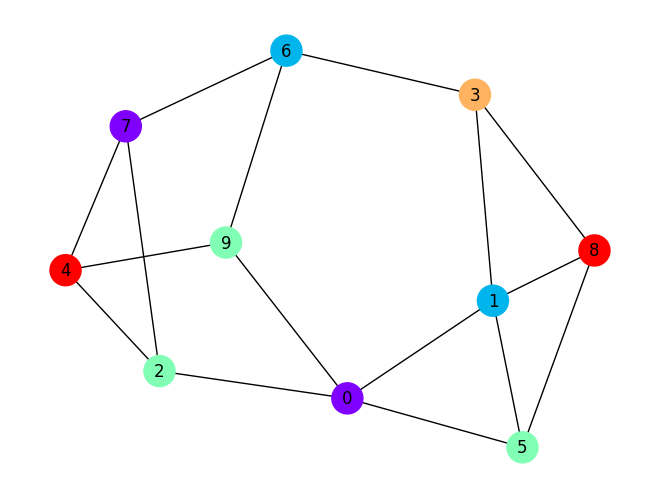

([0, 1, 2, 3, 4, 2, 1, 0, 4, 2], 5)

In [14]:
# Matriz 1 - 100 generaciones

matriz_adyacencia_1 = [
    [0, 1, 1, 0, 0, 1, 0, 0, 0, 1], 
    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0], 
    [1, 0, 0, 0, 1, 0, 0, 1, 0, 0], 
    [0, 1, 0, 0, 0, 0, 1, 0, 1, 0], 
    [0, 0, 1, 0, 0, 0, 0, 1, 0, 1], 
    [1, 1, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 1], 
    [0, 0, 1, 0, 1, 0, 1, 0, 0, 0], 
    [0, 1, 0, 1, 0, 1, 0, 0, 0, 0], 
    [1, 0, 0, 0, 1, 0, 1, 0, 0, 0] 
]

# Definimos el número de vértices
num_vertices = len(matriz_adyacencia_1)

# Definimos la población
n_poblacion_1 = 5
poblacion_1 = poblacion_inicial(matriz_adyacencia_1, num_vertices, n_poblacion_1)

# Definimos el número de generaciones
num_generaciones = 100

# Definimos la probabilidad de cruce y de mutación
proba_cruce = 0.8
proba_mutacion = 0.01

# Ejecutamos el algoritmo genético
solucion_final_1 = algoritmo_genetico(poblacion_1,num_generaciones,proba_cruce,proba_mutacion,matriz_adyacencia_1)

# Dibujamos la gráfica con la solución final
dibujar_grafica(matriz_adyacencia_1, solucion_final_1)

# Mostramos la solución final y el número de colores utilizados
solucion_final_1, evaluar_solucion(solucion_final_1)

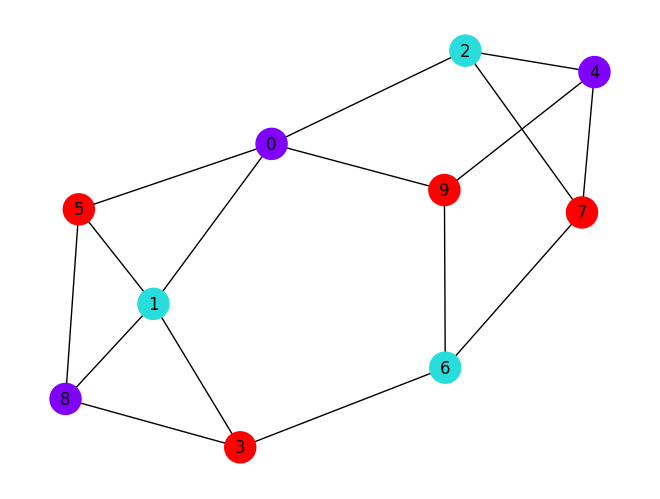

([0, 1, 1, 3, 0, 3, 1, 3, 0, 3], 3)

In [15]:
# Matriz 1 - 1000 generaciones

matriz_adyacencia_1 = [
    [0, 1, 1, 0, 0, 1, 0, 0, 0, 1], 
    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0], 
    [1, 0, 0, 0, 1, 0, 0, 1, 0, 0], 
    [0, 1, 0, 0, 0, 0, 1, 0, 1, 0], 
    [0, 0, 1, 0, 0, 0, 0, 1, 0, 1], 
    [1, 1, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 1], 
    [0, 0, 1, 0, 1, 0, 1, 0, 0, 0], 
    [0, 1, 0, 1, 0, 1, 0, 0, 0, 0], 
    [1, 0, 0, 0, 1, 0, 1, 0, 0, 0] 
]

# Definimos el número de vértices
num_vertices = len(matriz_adyacencia_1)

# Definimos la población
n_poblacion_1 = 5
poblacion_1 = poblacion_inicial(matriz_adyacencia_1, num_vertices, n_poblacion_1)

# Definimos el número de generaciones
num_generaciones = 1000

# Definimos la probabilidad de cruce y de mutación
proba_cruce = 0.8
proba_mutacion = 0.01

# Ejecutamos el algoritmo genético
solucion_final_1 = algoritmo_genetico(poblacion_1,num_generaciones,proba_cruce,proba_mutacion,matriz_adyacencia_1)

# Dibujamos la gráfica con la solución final
dibujar_grafica(matriz_adyacencia_1, solucion_final_1)

# Mostramos la solución final y el número de colores utilizados
solucion_final_1, evaluar_solucion(solucion_final_1)

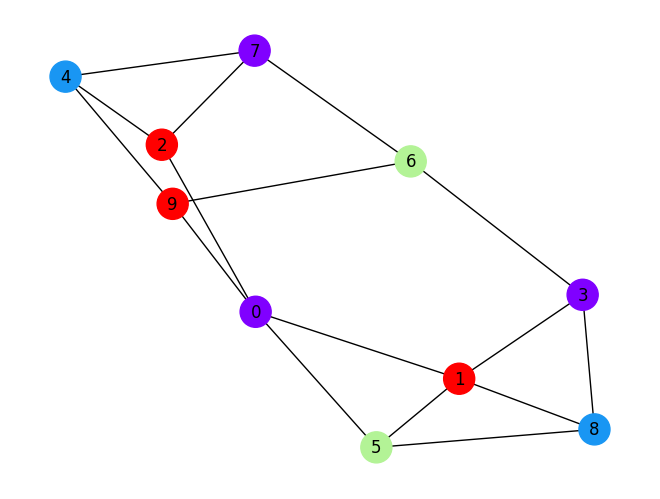

([3, 8, 8, 3, 4, 6, 6, 3, 4, 8], 4)

In [16]:
# Matriz 1 - 10000 generaciones

matriz_adyacencia_1 = [
    [0, 1, 1, 0, 0, 1, 0, 0, 0, 1], 
    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0], 
    [1, 0, 0, 0, 1, 0, 0, 1, 0, 0], 
    [0, 1, 0, 0, 0, 0, 1, 0, 1, 0], 
    [0, 0, 1, 0, 0, 0, 0, 1, 0, 1], 
    [1, 1, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 1], 
    [0, 0, 1, 0, 1, 0, 1, 0, 0, 0], 
    [0, 1, 0, 1, 0, 1, 0, 0, 0, 0], 
    [1, 0, 0, 0, 1, 0, 1, 0, 0, 0] 
]

# Definimos el número de vértices
num_vertices = len(matriz_adyacencia_1)

# Definimos la población
n_poblacion_1 = 5
poblacion_1 = poblacion_inicial(matriz_adyacencia_1, num_vertices, n_poblacion_1)

# Definimos el número de generaciones
num_generaciones = 10000

# Definimos la probabilidad de cruce y de mutación
proba_cruce = 0.8
proba_mutacion = 0.01

# Ejecutamos el algoritmo genético
solucion_final_1 = algoritmo_genetico(poblacion_1,num_generaciones,proba_cruce,proba_mutacion,matriz_adyacencia_1)

# Dibujamos la gráfica con la solución final
dibujar_grafica(matriz_adyacencia_1, solucion_final_1)

# Mostramos la solución final y el número de colores utilizados
solucion_final_1, evaluar_solucion(solucion_final_1)

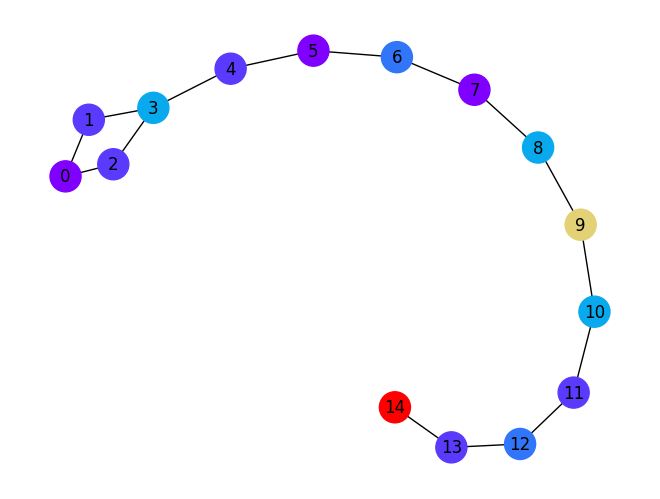

([0, 1, 1, 3, 1, 0, 2, 0, 3, 9, 3, 1, 2, 1, 13], 6)

In [17]:
# Matriz 2 - 100 generaciones

matriz_adyacencia_2 = [
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
]

# Definimos el número de vértices
num_vertices = len(matriz_adyacencia_2)

# Definimos la población
n_poblacion_2 = 8
poblacion_2 = poblacion_inicial(matriz_adyacencia_2, num_vertices, n_poblacion_2)

# Definimos el número de generaciones
num_generaciones_2 = 100

# Definimos la probabilidad de cruce y de mutación
proba_cruce = 0.8
proba_mutacion = 0.01

# Ejecutamos el algoritmo genético
solucion_final_2= algoritmo_genetico(poblacion_2,num_generaciones_2,proba_cruce,proba_mutacion,matriz_adyacencia_2)

# Dibujamos la gráfica con la solución final
dibujar_grafica(matriz_adyacencia_2, solucion_final_2)

# Mostramos la solución final y el número de colores utilizados
solucion_final_2, evaluar_solucion(solucion_final_2)

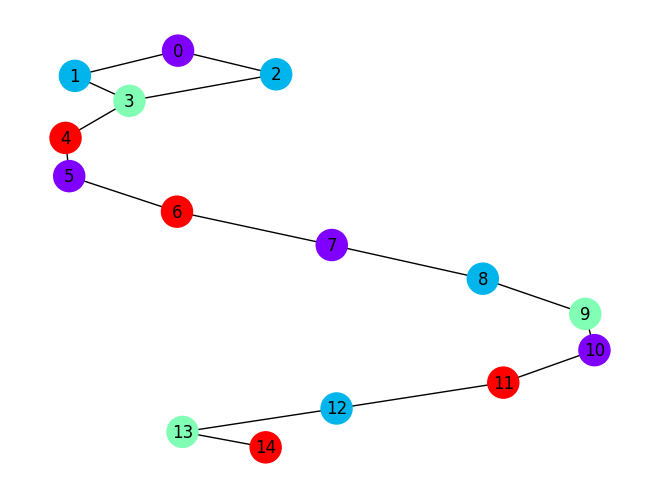

([0, 1, 1, 2, 4, 0, 4, 0, 1, 2, 0, 4, 1, 2, 4], 4)

In [18]:
# Matriz 2 - 1000 generaciones

matriz_adyacencia_2 = [
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
]

# Definimos el número de vértices
num_vertices = len(matriz_adyacencia_2)

# Definimos la población
n_poblacion_2 = 8
poblacion_2 = poblacion_inicial(matriz_adyacencia_2, num_vertices, n_poblacion_2)

# Definimos el número de generaciones
num_generaciones_2 = 1000

# Definimos la probabilidad de cruce y de mutación
proba_cruce = 0.8
proba_mutacion = 0.01

# Ejecutamos el algoritmo genético
solucion_final_2= algoritmo_genetico(poblacion_2,num_generaciones_2,proba_cruce,proba_mutacion,matriz_adyacencia_2)

# Dibujamos la gráfica con la solución final
dibujar_grafica(matriz_adyacencia_2, solucion_final_2)

# Mostramos la solución final y el número de colores utilizados
solucion_final_2, evaluar_solucion(solucion_final_2)

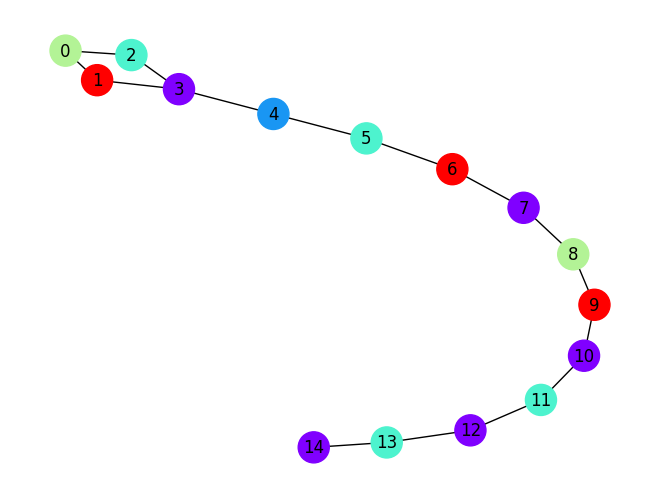

([3, 5, 2, 0, 1, 2, 5, 0, 3, 5, 0, 2, 0, 2, 0], 5)

In [19]:
# Matriz 2 - 10000 generaciones

matriz_adyacencia_2 = [
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
]

# Definimos el número de vértices
num_vertices = len(matriz_adyacencia_2)

# Definimos la población
n_poblacion_2 = 8
poblacion_2 = poblacion_inicial(matriz_adyacencia_2, num_vertices, n_poblacion_2)

# Definimos el número de generaciones
num_generaciones_2 = 10000

# Definimos la probabilidad de cruce y de mutación
proba_cruce = 0.8
proba_mutacion = 0.01

# Ejecutamos el algoritmo genético
solucion_final_2= algoritmo_genetico(poblacion_2,num_generaciones_2,proba_cruce,proba_mutacion,matriz_adyacencia_2)

# Dibujamos la gráfica con la solución final
dibujar_grafica(matriz_adyacencia_2, solucion_final_2)

# Mostramos la solución final y el número de colores utilizados
solucion_final_2, evaluar_solucion(solucion_final_2)

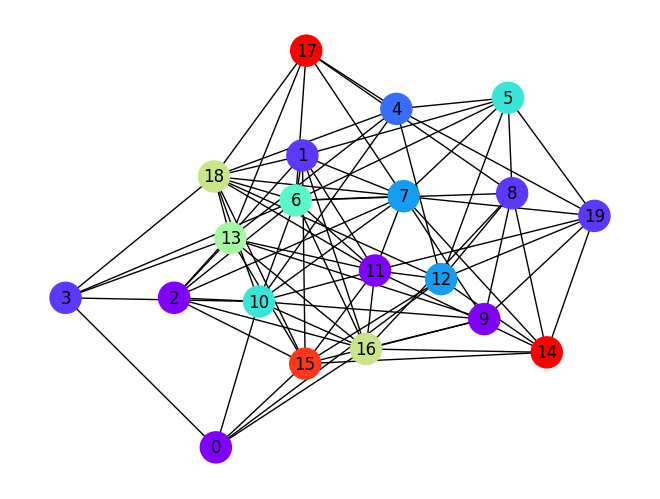

([0, 1, 0, 1, 2, 5, 6, 3, 1, 0, 5, 0, 3, 8, 14, 13, 9, 14, 9, 1], 10)

In [20]:
# Matriz 3 - 100 generaciones

matriz_adyacencia_3 = [
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1],
    [0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
    [0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1],
    [1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1],
    [1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1],
    [0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0],
    [1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0]
]

# Definimos el número de vértices
num_vertices = len(matriz_adyacencia_3)

# Definimos la población
n_poblacion_3 = 15
poblacion_3 = poblacion_inicial(matriz_adyacencia_3, num_vertices, n_poblacion_3)

# Definimos el número de generaciones
num_generaciones_3 = 100

# Definimos la probabilidad de cruce y de mutación
proba_cruce = 0.8
proba_mutacion = 0.01

# Ejecutamos el algoritmo genético
solucion_final_3= algoritmo_genetico(poblacion_3,num_generaciones_3,proba_cruce,proba_mutacion,matriz_adyacencia_3)

# Dibujamos la gráfica con la solución final
dibujar_grafica(matriz_adyacencia_3, solucion_final_3)

# Mostramos la solución final y el número de colores utilizados
solucion_final_3, evaluar_solucion(solucion_final_3)

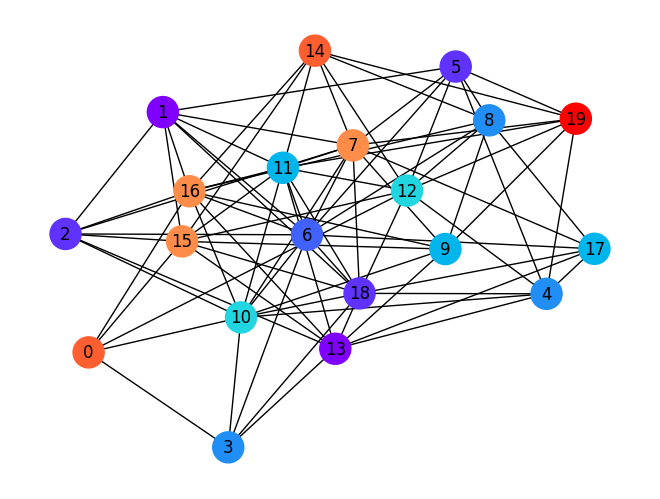

([14, 0, 1, 3, 3, 1, 2, 13, 3, 4, 5, 4, 5, 0, 14, 13, 13, 4, 1, 16], 9)

In [21]:
# Matriz 3 - 1000 generaciones

matriz_adyacencia_3 = [
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1],
    [0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
    [0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1],
    [1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1],
    [1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1],
    [0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0],
    [1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0]
]

# Definimos el número de vértices
num_vertices = len(matriz_adyacencia_3)

# Definimos la población
n_poblacion_3 = 15
poblacion_3 = poblacion_inicial(matriz_adyacencia_3, num_vertices, n_poblacion_3)

# Definimos el número de generaciones
num_generaciones_3 = 1000

# Definimos la probabilidad de cruce y de mutación
proba_cruce = 0.8
proba_mutacion = 0.01

# Ejecutamos el algoritmo genético
solucion_final_3= algoritmo_genetico(poblacion_3,num_generaciones_3,proba_cruce,proba_mutacion,matriz_adyacencia_3)

# Dibujamos la gráfica con la solución final
dibujar_grafica(matriz_adyacencia_3, solucion_final_3)

# Mostramos la solución final y el número de colores utilizados
solucion_final_3, evaluar_solucion(solucion_final_3)

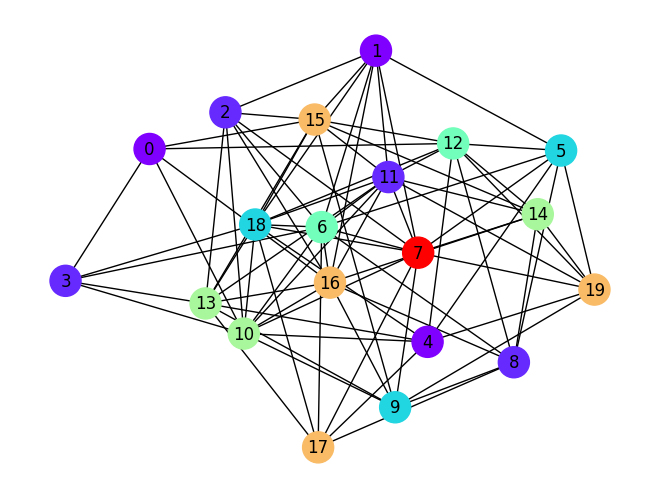

([0, 0, 1, 1, 0, 6, 9, 19, 1, 6, 11, 1, 9, 11, 11, 14, 14, 14, 6, 14], 7)

In [22]:
# Matriz 3 - 10000 generaciones

matriz_adyacencia_3 = [
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1],
    [0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
    [0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1],
    [1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1],
    [1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1],
    [0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0],
    [1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0]
]

# Definimos el número de vértices
num_vertices = len(matriz_adyacencia_3)

# Definimos la población
n_poblacion_3 = 15
poblacion_3 = poblacion_inicial(matriz_adyacencia_3, num_vertices, n_poblacion_3)

# Definimos el número de generaciones
num_generaciones_3 = 10000

# Definimos la probabilidad de cruce y de mutación
proba_cruce = 0.8
proba_mutacion = 0.01

# Ejecutamos el algoritmo genético
solucion_final_3= algoritmo_genetico(poblacion_3,num_generaciones_3,proba_cruce,proba_mutacion,matriz_adyacencia_3)

# Dibujamos la gráfica con la solución final
dibujar_grafica(matriz_adyacencia_3, solucion_final_3)

# Mostramos la solución final y el número de colores utilizados
solucion_final_3, evaluar_solucion(solucion_final_3)